# Online Selection of HLS Representations

In [1]:
from lrcb.bandits.multirep_finite import FiniteMultiBandit
from lrcb.representations.finite_representations import make_random_rep, hls_rank, rank, derank_hls, make_hls_rank
from lrcb.representations.finite_representations import is_cmb, is_hls, spans, hls_lambda, derank_cmb
from lrcb.algos.oful import oful
from lrcb.algos.lr_oful import select_oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu
plt.rcParams['figure.figsize'] = [12, 9]

## Common settings

In [2]:
nc = 100
na = 5
dim = 20
noise = 0.1
seeds = range(10)

Generate original HLS representation

In [3]:
r0 = make_random_rep(nc, na, dim, normalize=True)
assert is_hls(r0)

OFUL settings

In [4]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

## CMB, destructive approach, same parameter

Generate non-HLS equivalent representations with varying HLS rank

In [5]:
reps = [derank_hls(r0, i, transform=False) for i in range(1, dim)]
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert np.allclose(r._param, reps[-1]._param) #with the same parameter!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s %f %f' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else '', r.feat_bound(), r.opt_feat_bound()))
print('%d/%d %s %f %f' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else '', reps[-1].feat_bound(), reps[-1].opt_feat_bound()))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB) 20.192354 8.674213
2/20 (CMB) 20.192354 16.585175
3/20 (CMB) 20.192354 16.585175
4/20 (CMB) 20.192354 16.999385
5/20 (CMB) 20.192354 16.999385
6/20 (CMB) 20.192354 16.999385
7/20 (CMB) 20.192354 16.999385
8/20 (CMB) 20.192354 17.248687
9/20 (CMB) 20.192354 17.248687
10/20 (CMB) 20.192354 17.248687
11/20 (CMB) 20.192354 18.347384
12/20 (CMB) 20.192354 18.347384
13/20 (CMB) 20.192354 18.347384
14/20 (CMB) 20.192354 18.347384
15/20 (CMB) 20.192354 18.347384
16/20 (CMB) 20.192354 18.347384
17/20 (CMB) 20.192354 18.347384
18/20 (CMB) 20.192354 18.347384
19/20 (CMB) 20.192354 18.347384
20/20 (CMB) 20.192354 18.585963


Regret of OFUL with different representations

In [6]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

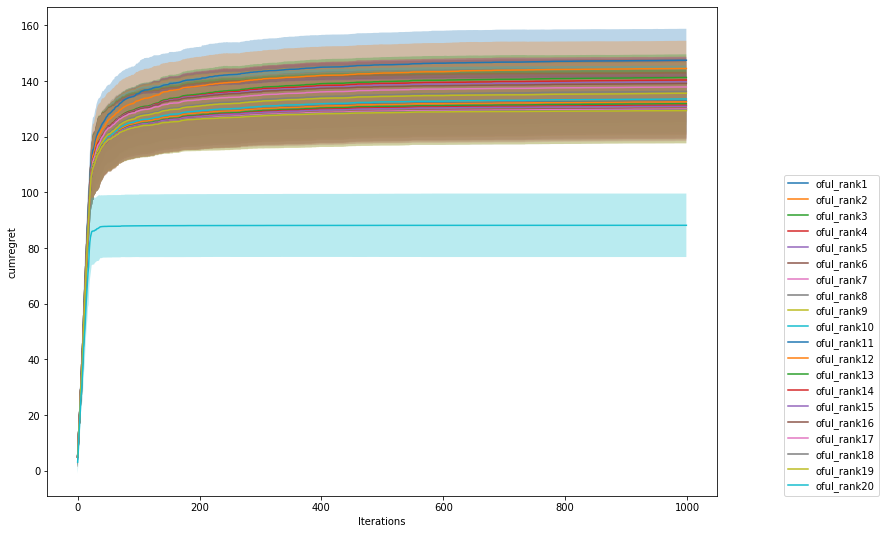

In [7]:
names = ['oful_rank%d' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [8]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank20', 88.1751714880335),
 ('oful_rank19', 129.37910902110212),
 ('oful_rank18', 129.60106623479155),
 ('oful_rank17', 129.9761542570629),
 ('oful_rank16', 130.226355625881),
 ('oful_rank15', 130.9437159993221),
 ('oful_rank14', 131.30730581920798),
 ('oful_rank13', 131.8783721172817),
 ('oful_rank12', 132.57680796002953),
 ('oful_rank11', 132.78444862312915),
 ('oful_rank10', 133.58399052812663),
 ('oful_rank9', 135.63485302510574),
 ('oful_rank8', 136.2879656556924),
 ('oful_rank7', 137.88694666363835),
 ('oful_rank6', 139.14362291240266),
 ('oful_rank5', 139.73395362652585),
 ('oful_rank4', 140.3904259707117),
 ('oful_rank3', 141.28619424716544),
 ('oful_rank2', 144.5392120147643),
 ('oful_rank1', 147.5006320680028)]

Regret of model-selection algorithm compared to best model

In [9]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select')

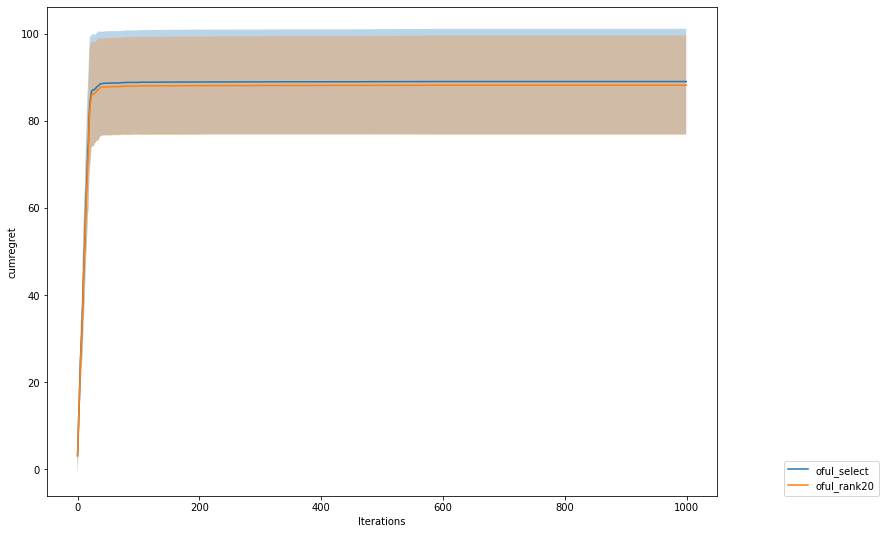

In [10]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

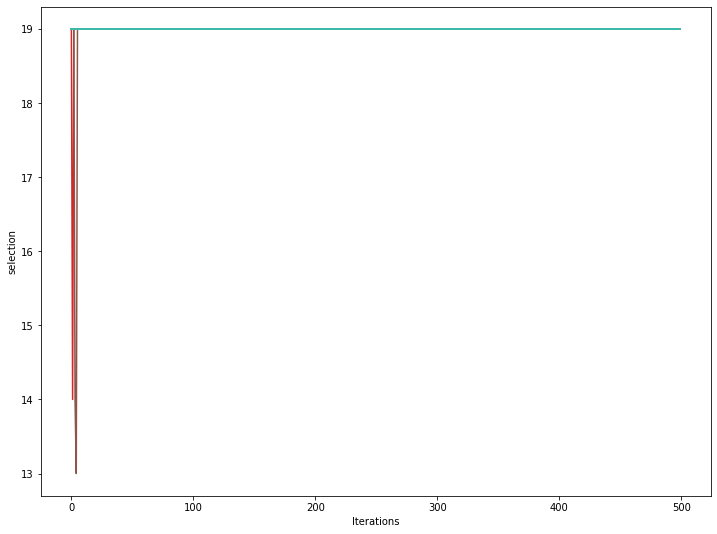

In [11]:
nu.plot_all('../logs', 'oful_select', 'selection', seeds, rows=500)

## CMB, destructive approach, different parameter (t)

Re-use the same original HLS representation

Generate non-HLS **equivalent** representations with varying HLS rank **and different parameters**

In [12]:
reps = [derank_hls(r0, i, transform=True) for i in range(1, dim)] #Random transformation preserving equivalence
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not np.allclose(r._param, reps[-1]._param) #But with different parameters!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s %f %f' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else '', r.feat_bound(), r.opt_feat_bound()))
print('%d/%d %s %f %f' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else '', reps[-1].feat_bound(), reps[-1].opt_feat_bound()))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB) 20.192354 8.674213
2/20 (CMB) 20.192354 16.585175
3/20 (CMB) 20.192354 16.585175
4/20 (CMB) 20.192354 16.999385
5/20 (CMB) 20.192354 16.999385
6/20 (CMB) 20.192354 16.999385
7/20 (CMB) 20.192354 16.999385
8/20 (CMB) 20.192354 17.248687
9/20 (CMB) 20.192354 17.248687
10/20 (CMB) 20.192354 17.248687
11/20 (CMB) 20.192354 18.347384
12/20 (CMB) 20.192354 18.347384
13/20 (CMB) 20.192354 18.347384
14/20 (CMB) 20.192354 18.347384
15/20 (CMB) 20.192354 18.347384
16/20 (CMB) 20.192354 18.347384
17/20 (CMB) 20.192354 18.347384
18/20 (CMB) 20.192354 18.347384
19/20 (CMB) 20.192354 18.347384
20/20 (CMB) 20.192354 18.585963


Regret of OFUL with different representations

In [13]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(t)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

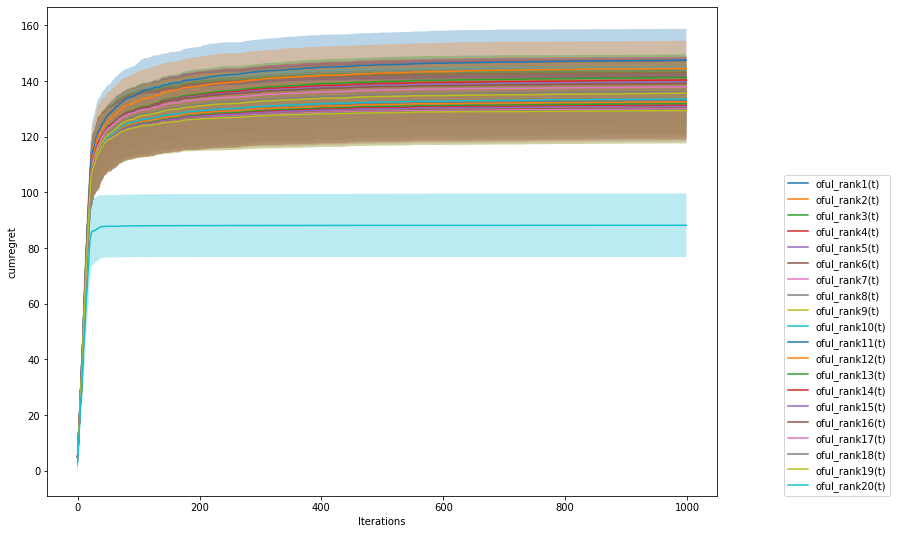

In [14]:
names = ['oful_rank%d(t)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [15]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank20(t)', 88.1751714880335),
 ('oful_rank19(t)', 129.379109021102),
 ('oful_rank18(t)', 129.6010662347916),
 ('oful_rank17(t)', 129.97615425706277),
 ('oful_rank16(t)', 130.226355625881),
 ('oful_rank15(t)', 130.94371599932205),
 ('oful_rank14(t)', 131.30730581920793),
 ('oful_rank13(t)', 131.87837211728166),
 ('oful_rank12(t)', 132.5768079600296),
 ('oful_rank11(t)', 132.78444862312904),
 ('oful_rank10(t)', 133.5839905281267),
 ('oful_rank9(t)', 135.63485302510568),
 ('oful_rank8(t)', 136.28796565569235),
 ('oful_rank7(t)', 137.88694666363833),
 ('oful_rank6(t)', 139.1436229124027),
 ('oful_rank5(t)', 139.73395362652587),
 ('oful_rank4(t)', 140.39042597071148),
 ('oful_rank3(t)', 141.28619424716538),
 ('oful_rank2(t)', 144.53921201476436),
 ('oful_rank1(t)', 147.5006320680029)]

Regret of model-selection algorithm compared to best model

In [16]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(t)')

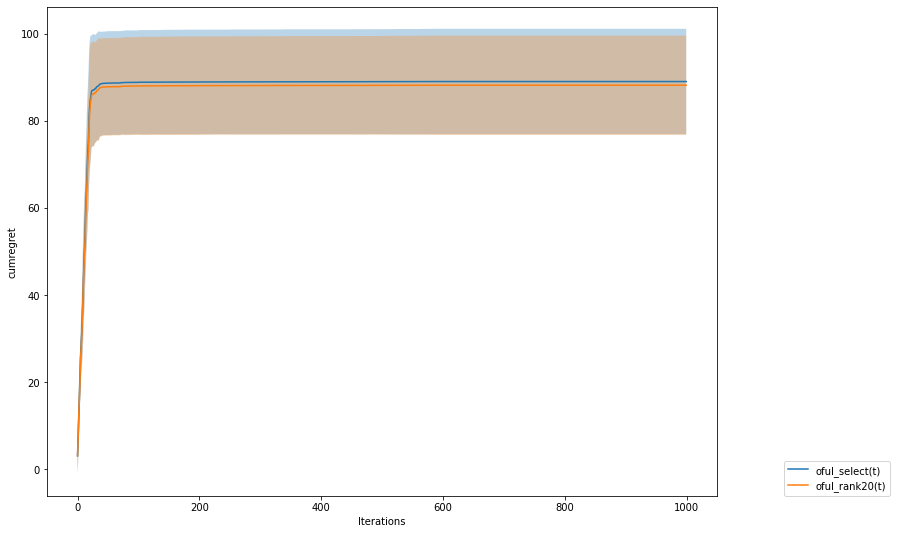

In [17]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(t)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

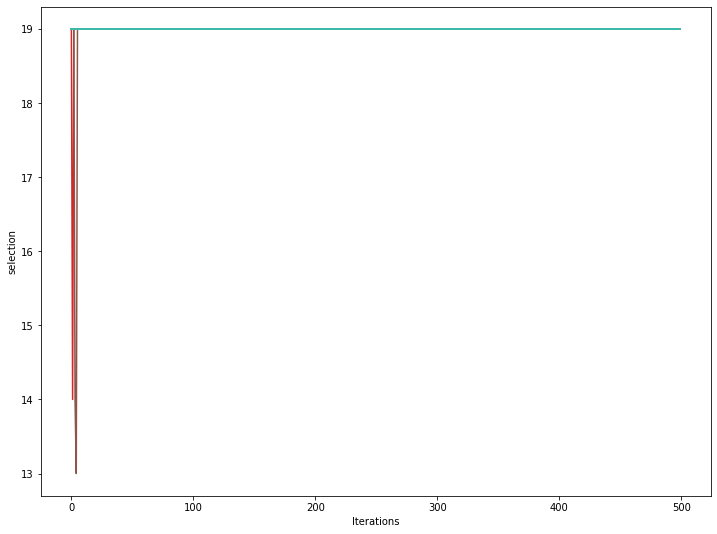

In [18]:
nu.plot_all('../logs', 'oful_select(t)', 'selection', seeds, rows=500)

## CMB, constructive approach (different parameter) (c)

This time I construct a representation of the desired hls rank starting from (the same) reward function

In [19]:
y = r0._rewards

In [20]:
reps = [make_hls_rank(y, dim=dim, rank=i) for i in range(1, dim+1)]

for i, r in enumerate(reps):
    assert np.allclose(r._rewards, y)  #All representations are equivalent
    assert hls_rank(r) == i+1 #But with different HLS ranks
    assert spans(r) #All representations still span R^d
    print('%d/%d %s %f %f' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else '', r.feat_bound(), r.opt_feat_bound()))
    
#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB) 18.298453 8.419192
2/20 (CMB) 15.500454 8.975188
3/20 (CMB) 16.243167 10.138589
4/20 (CMB) 15.461823 10.138589
5/20 (CMB) 19.224217 10.916185
6/20 (CMB) 18.168784 10.916185
7/20 (CMB) 16.816678 10.916185
8/20 (CMB) 14.292380 10.916185
9/20 (CMB) 17.123749 10.916185
10/20 (CMB) 18.347701 10.916185
11/20 (CMB) 16.352648 10.916185
12/20 (CMB) 13.021598 10.916185
13/20 (CMB) 15.791713 10.916185
14/20 (CMB) 17.389673 11.122304
15/20 (CMB) 17.908888 11.122304
16/20 (CMB) 17.150197 11.122304
17/20 (CMB) 17.246847 11.122304
18/20 (CMB) 15.304911 11.122304
19/20 (CMB) 19.619163 11.122304
20/20 (CMB) 16.214579 11.122304


Regret of OFUL with different representations

In [21]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(c)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

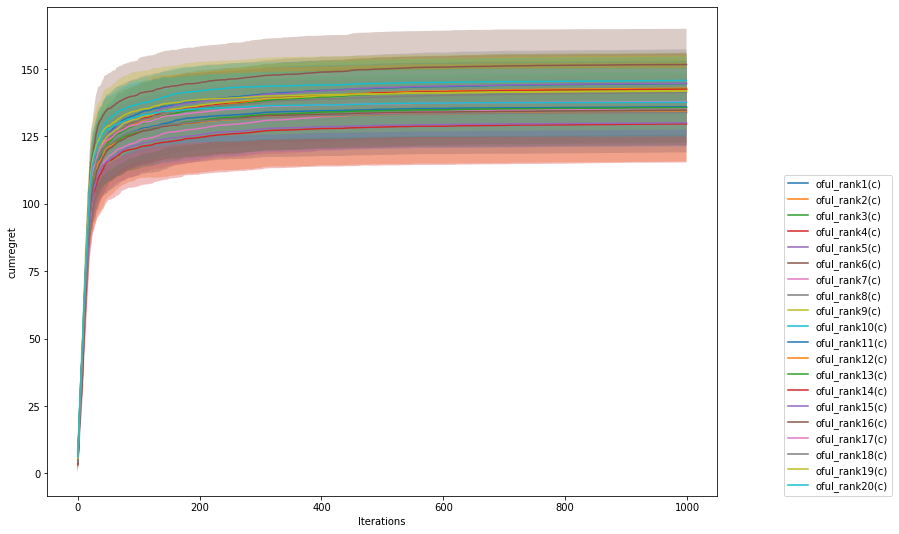

In [22]:
names = ['oful_rank%d(c)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret

In [23]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank14(c)', 129.62344384976703),
 ('oful_rank15(c)', 130.05470457301521),
 ('oful_rank18(c)', 133.8551105491644),
 ('oful_rank12(c)', 134.060537393959),
 ('oful_rank16(c)', 134.7400841891845),
 ('oful_rank7(c)', 135.39639734387498),
 ('oful_rank13(c)', 135.66940481018358),
 ('oful_rank11(c)', 136.01162116015433),
 ('oful_rank20(c)', 137.6536008237844),
 ('oful_rank17(c)', 137.89857252749076),
 ('oful_rank8(c)', 141.265709129949),
 ('oful_rank19(c)', 141.76118191310226),
 ('oful_rank9(c)', 141.9976533151314),
 ('oful_rank4(c)', 142.45184108942635),
 ('oful_rank3(c)', 142.4769054796205),
 ('oful_rank2(c)', 142.84602657578972),
 ('oful_rank1(c)', 144.57569449737144),
 ('oful_rank5(c)', 144.71617947492547),
 ('oful_rank10(c)', 145.75636562805542),
 ('oful_rank6(c)', 151.6517611479672)]

Regret of model-selection algorithm compared to best model

In [24]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(c)')

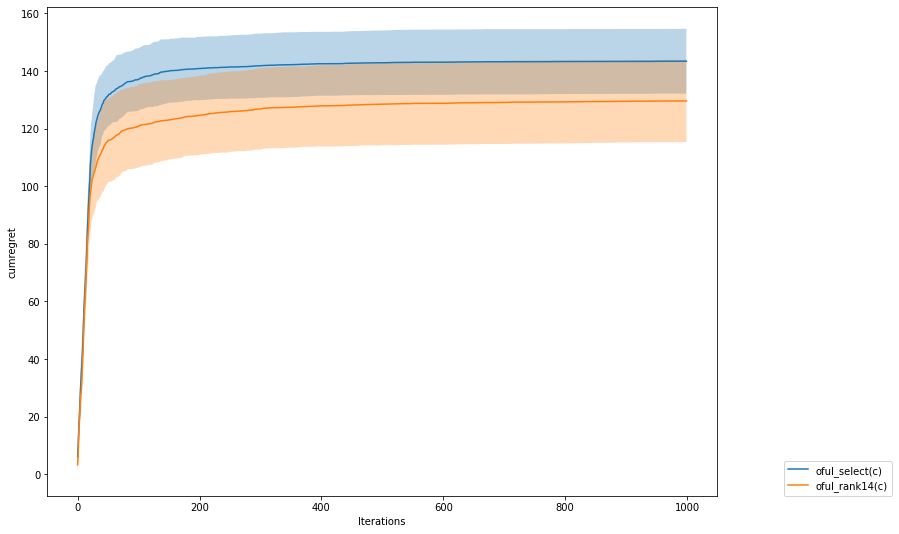

In [25]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(c)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

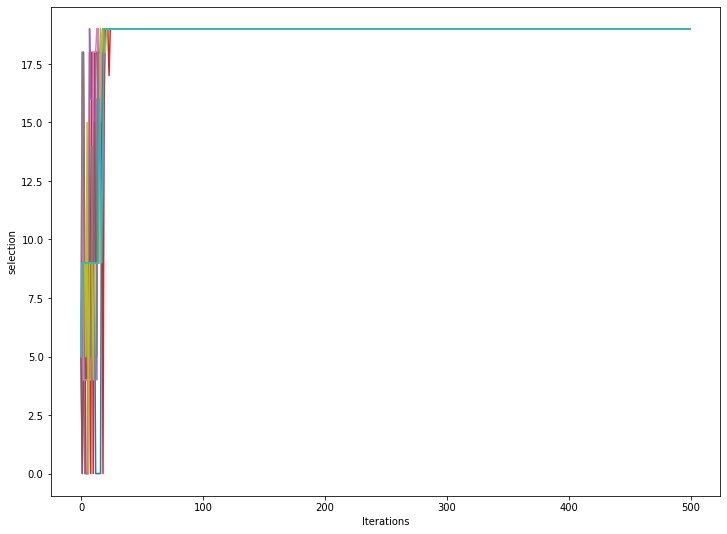

In [26]:
nu.plot_all('../logs', 'oful_select(c)', 'selection', seeds, rows=500)

## Why the difference? (different HLS representations)

Original HLS representation

In [27]:
rA = r0

Constructed HLS representation

In [28]:
rB = make_hls_rank(r0._rewards, dim=dim, rank=dim)

Both are HLS and equivalent

In [29]:
assert rA == rB
assert is_hls(rA)
assert is_hls(rB)

But the performance of OFUL is different

In [30]:
problem = FiniteMultiBandit(nc, na, [rA, rB])

In [31]:
for seed in seeds:
        problem.select_rep(0)
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='ofulA')
        problem.select_rep(1)
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='ofulB')

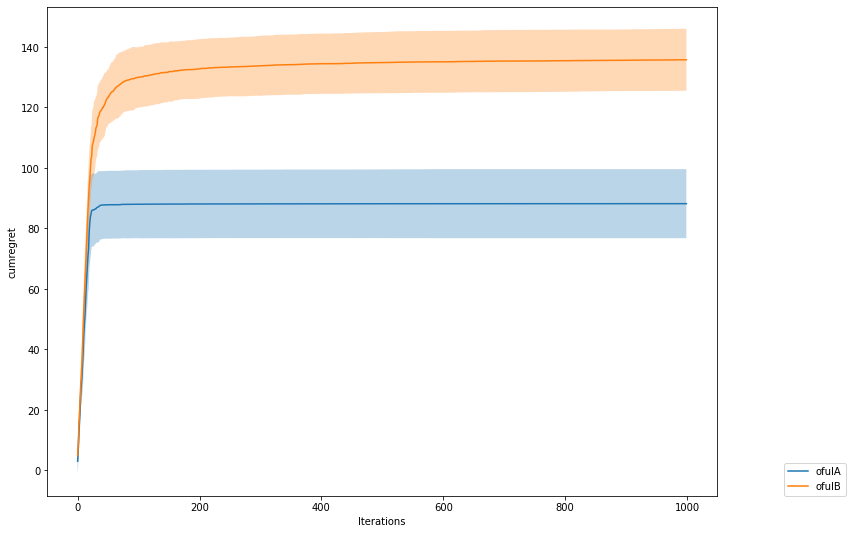

In [32]:
nu.compare('../logs', ['ofulA', 'ofulB'], 'cumregret', seeds)

The reason may be that the minimum eigenvalue of optimal features is different

In [33]:
hls_lambda(rA)

329.8092740345726

In [34]:
hls_lambda(rB)

54.53635223949104

In [35]:
rA.feat_bound(), rA.opt_feat_bound()

(20.19235374123191, 18.585962903256373)

In [36]:
rB.feat_bound(), rB.opt_feat_bound()

(18.29845321079014, 11.122304074741137)

In [37]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_selectAB')

oful_select is able to select the best representation

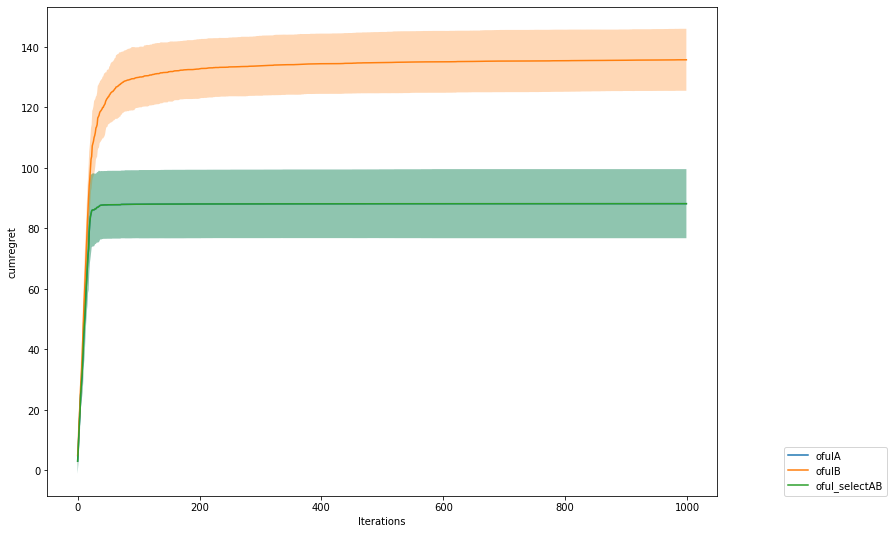

In [38]:
nu.compare('../logs', ['ofulA', 'ofulB', 'oful_selectAB'], 'cumregret', seeds)

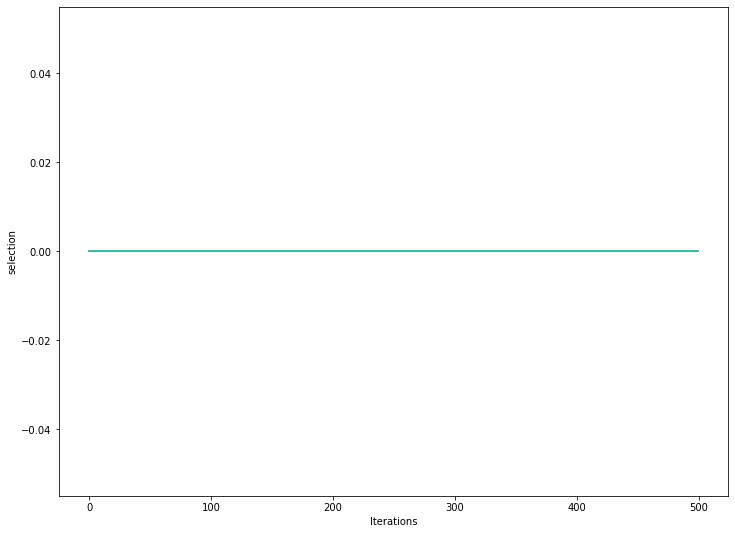

In [39]:
nu.plot_all('../logs', 'oful_selectAB', 'selection', seeds, rows=500)

## Not CMB (destructive, different param) (n)

I make the original representation NOT CMB while preserving HLS

In [40]:
rr = derank_cmb(r0, save_hls=True)
assert rr == r0
assert is_hls(rr)
assert not is_cmb(rr)

In [41]:
reps = [derank_hls(rr, i, transform=True) for i in range(1, dim)] #Random transformation preserving equivalence
reps.append(rr)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not np.allclose(r._param, reps[-1]._param) #But with different parameters!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    assert not is_cmb(r) #None of them is CMB
    print('%d/%d %s %f %f' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else '', r.feat_bound(), r.opt_feat_bound()))
print('%d/%d %s %f %f' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else '', reps[-1].feat_bound(), reps[-1].opt_feat_bound()))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20  20.192354 8.724903
2/20  20.192354 16.585175
3/20  20.192354 16.585175
4/20  20.192354 16.999385
5/20  20.192354 16.999385
6/20  20.192354 16.999385
7/20  20.192354 16.999385
8/20  20.192354 17.248687
9/20  20.192354 17.248687
10/20  20.192354 17.248687
11/20  20.192354 18.347384
12/20  20.192354 18.347384
13/20  20.192354 18.347384
14/20  20.192354 18.347384
15/20  20.192354 18.347384
16/20  20.192354 18.347384
17/20  20.192354 18.347384
18/20  20.192354 18.347384
19/20  20.192354 18.347384
20/20  20.192354 18.585963


Regret of OFUL with different representations

In [42]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(n)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

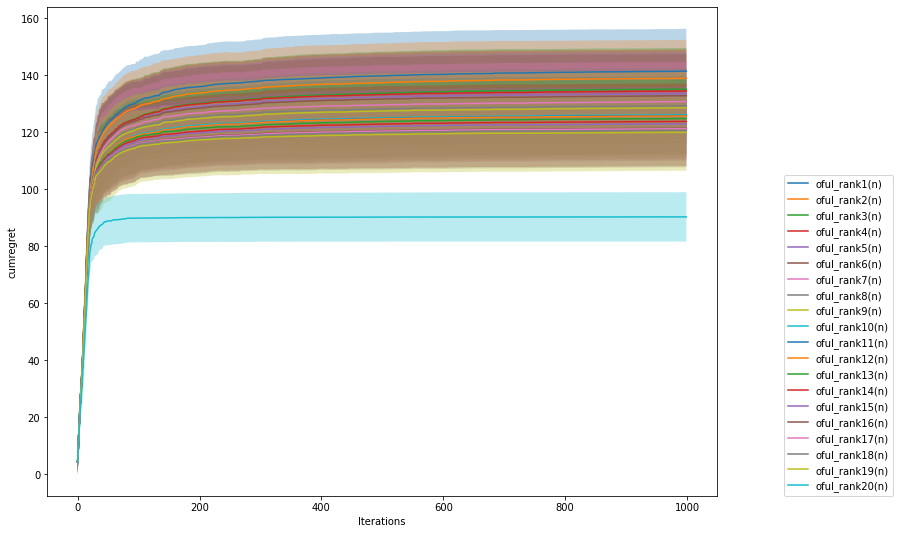

In [43]:
names = ['oful_rank%d(n)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [44]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank20(n)', 90.28445228264391),
 ('oful_rank19(n)', 119.98106893493836),
 ('oful_rank18(n)', 120.70753311133053),
 ('oful_rank17(n)', 121.27642955300053),
 ('oful_rank16(n)', 121.4399446680299),
 ('oful_rank15(n)', 122.9620456654357),
 ('oful_rank14(n)', 123.81108700803618),
 ('oful_rank13(n)', 124.81643687351246),
 ('oful_rank12(n)', 125.75392128712488),
 ('oful_rank11(n)', 125.90070283332686),
 ('oful_rank10(n)', 126.15620215911024),
 ('oful_rank9(n)', 128.6048785675473),
 ('oful_rank8(n)', 129.33151240934802),
 ('oful_rank7(n)', 130.78816190781893),
 ('oful_rank6(n)', 132.85132704453335),
 ('oful_rank5(n)', 133.51864195734726),
 ('oful_rank4(n)', 134.5106631335621),
 ('oful_rank3(n)', 135.19040734932625),
 ('oful_rank2(n)', 138.996715221254),
 ('oful_rank1(n)', 141.50025107179385)]

Regret of model-selection algorithm compared to best model

In [45]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(n)')

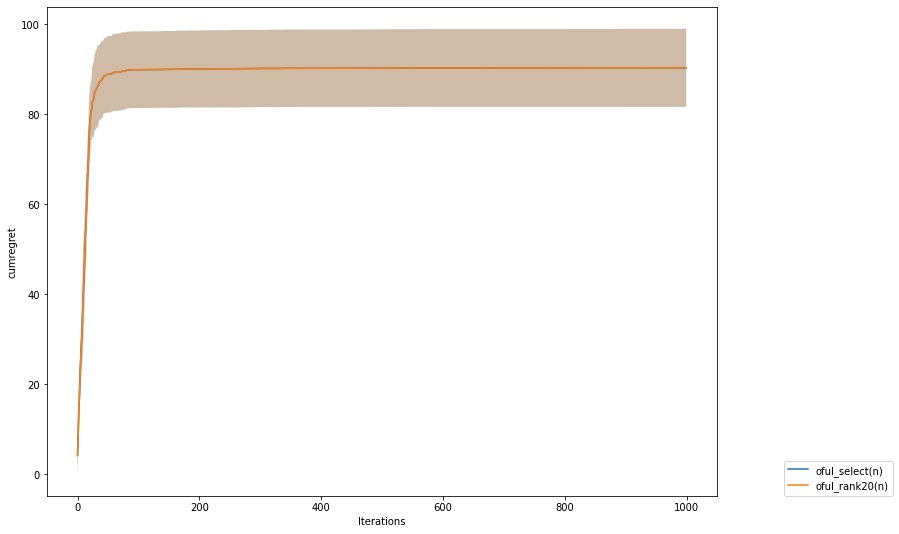

In [46]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(n)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

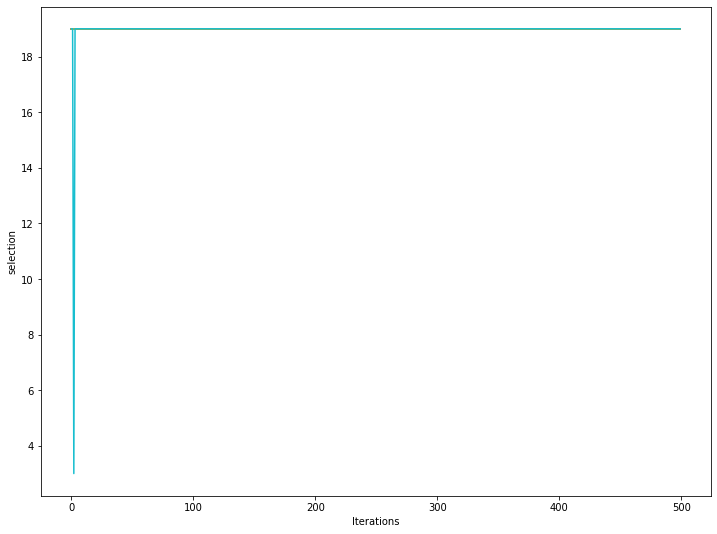

In [47]:
nu.plot_all('../logs', 'oful_select(n)', 'selection', seeds, rows=500)

In [48]:
hls_lambda(rr)

175.92554875850908

In [49]:
hls_lambda(r0)

329.8092740345726